# CNN Architectures and Pretrained Models



# Imports

In [ ]:
# !pip uninstall tf-keras
# !pip install tensorflow==2.16.1

In [ ]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.3.3 Tensorflow Current Version: 2.16.1


In [ ]:
from glob import glob
import random, os, datetime

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

# Functions

In [ ]:
def get_image_paths(root_dir, num_images=None):
    all_images = []
    for extension in ['*.jpg', '*.jpeg', '*.png']:
        all_images.extend(glob(os.path.join(root_dir, '**', extension), recursive=True))
    if num_images is None:
        return all_images
    else:
        return random.sample(all_images, min(num_images, len(all_images)))

def display_images(img_list):
    plt.figure(figsize=(15, 6))
    for i, img_path in enumerate(img_list):
        img = image.load_img(img_path)
        img = image.img_to_array(img, dtype=np.uint8)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze())
        plt.axis('off')
        plt.title(f'Image {i+1}')
    plt.tight_layout()
    plt.show()


def print_predicted_classes(predicted_classes):
    for full_path, (label, probability) in predicted_classes.items():
        filename = os.path.basename(full_path)
        print(f"{filename}: {label} ({probability:.2f}%)")

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/imagenet_samples'

In [ ]:
img_list = get_image_paths(dir_path)

In [ ]:
len(img_list)

40

In [ ]:
get_image_paths(dir_path, 5)

['/content/drive/MyDrive/Colab Notebooks/imagenet_samples/boxer.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/imagenet_samples/pot.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/imagenet_samples/power_drill.jpeg',
 "/content/drive/MyDrive/Colab Notebooks/imagenet_samples/potter's_wheel.jpeg",
 '/content/drive/MyDrive/Colab Notebooks/imagenet_samples/Eskimo_dog.jpeg']

In [ ]:
img_list = get_image_paths(dir_path, 10)

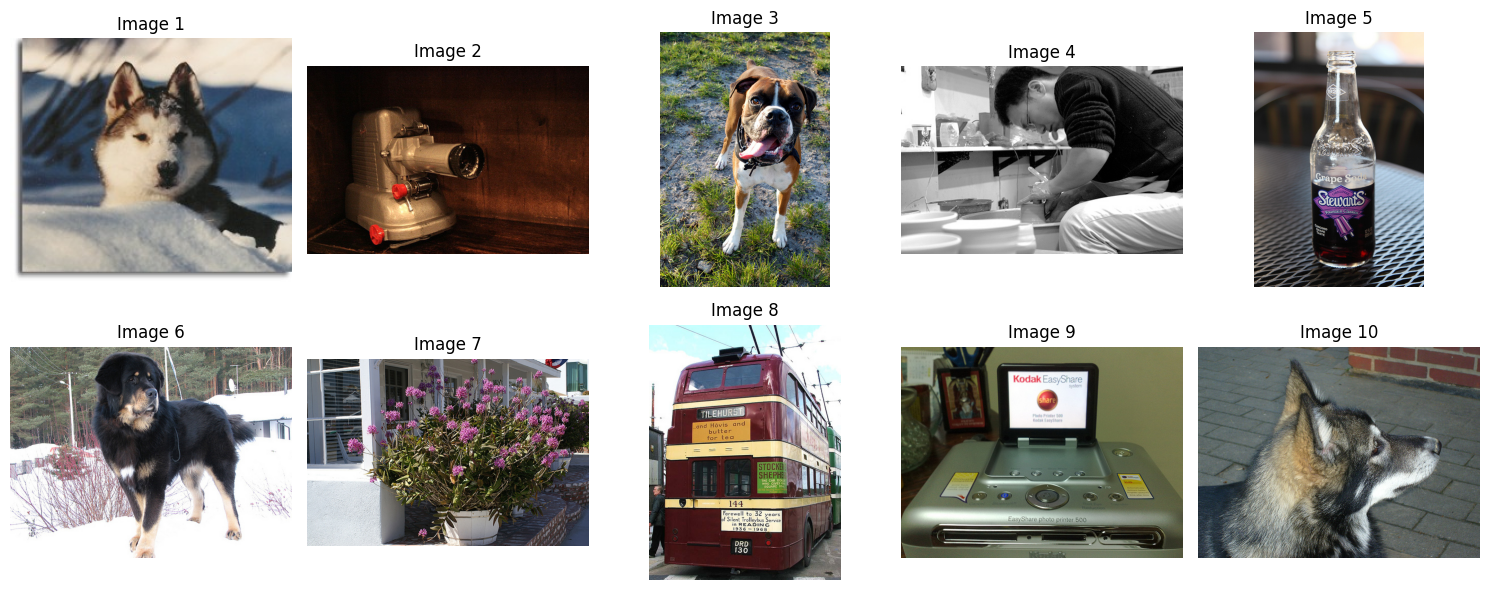

In [ ]:
display_images(img_list)

# VGG 16


In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input as preprocess_input_vgg16, decode_predictions as decode_vgg16

In [ ]:
def preprocess_vgg16(img_path):
    img = image.load_img(img_path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array = preprocess_input_vgg16(img_array)

    return img_array


In [ ]:
def predict_vgg16(model, img_array):

    predictions = model.predict(img_array, verbose=0)

    top_predictions = decode_vgg16(predictions, top=1)[0][0]

    label, probability = top_predictions[1], top_predictions[2]

    return label, probability

In [ ]:
def visualise_preds_vgg16(model, image_paths, visualize=False):
    results = {}

    for img_path in image_paths:

        img_array = preprocess_vgg16(img_path)

        label, probability = predict_vgg16(model, img_array)

        results[img_path] = (label, probability)

        if visualize:
            plt.figure(figsize=(5, 5))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results

In [ ]:
model_vgg16 = VGG16(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [ ]:
model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

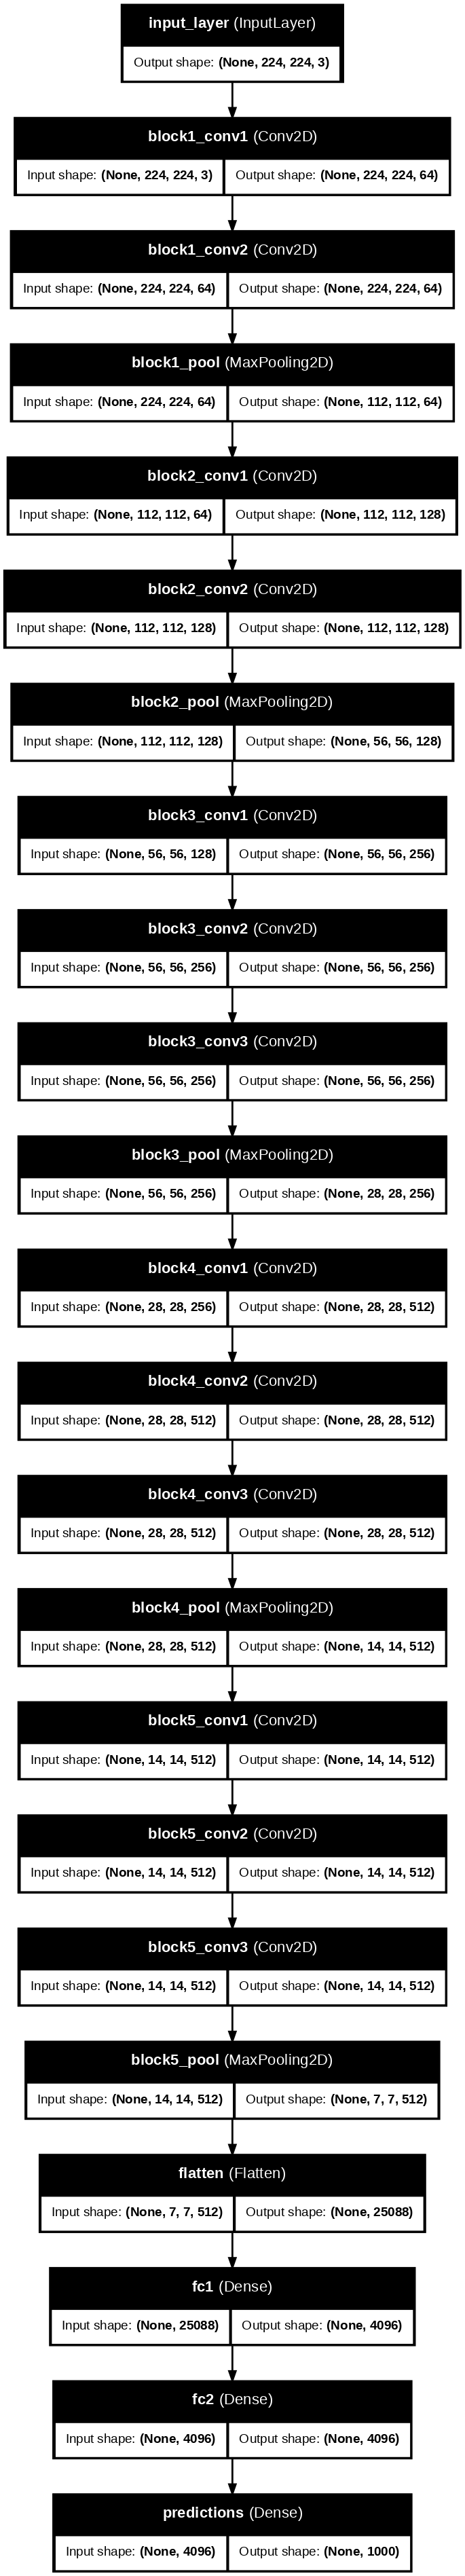

In [ ]:
plot_model(model_vgg16, show_shapes=True, show_layer_names=True, dpi=100)

In [ ]:
total_trainable_params = sum(layer.count_params() for layer in model_vgg16.layers if layer.trainable)
print(f"Total trainable parameters: {total_trainable_params}")

Total trainable parameters: 138357544


In [ ]:
predicted_classes = visualise_preds_vgg16(model_vgg16, img_list, True)

In [ ]:
print_predicted_classes(predicted_classes)

Eskimo_dog.jpeg: Eskimo_dog (0.49%)
projector.jpeg: projector (0.33%)
boxer.jpeg: boxer (0.85%)
potter's_wheel.jpeg: potter's_wheel (0.19%)
pop_bottle.jpeg: pop_bottle (0.57%)
Tibetan_mastiff.jpeg: Tibetan_mastiff (1.00%)
pot.jpeg: pot (0.80%)
trolleybus.jpeg: trolleybus (0.89%)
printer.jpeg: printer (0.45%)
malamute.jpeg: German_shepherd (0.23%)


# Xception

In [ ]:
from keras.applications.xception import Xception, preprocess_input as preprocess_input_xception, decode_predictions as decode_xception

def preprocess_xception(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input_xception(img_array)
    return img_array

In [ ]:
def predict_xception(model, img_array):

    predictions = model.predict(img_array, verbose=0)

    top_predictions = decode_xception(predictions, top=1)[0][0]

    label, probability = top_predictions[1], top_predictions[2]

    return label, probability

In [ ]:
def visualise_preds_xception(model, image_paths, visualize=False):
    results = {}
    for img_path in image_paths:
        img_array = preprocess_xception(img_path)
        label, probability = predict_xception(model, img_array)
        results[img_path] = (label, probability)
        if visualize:
            plt.figure(figsize=(5, 5))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results

In [ ]:
model_xception = Xception(weights='imagenet')

predicted_classes = visualise_preds_xception(model_xception, img_list, True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print_predicted_classes(predicted_classes)

Eskimo_dog.jpeg: Eskimo_dog (0.66%)
projector.jpeg: projector (0.60%)
boxer.jpeg: boxer (0.97%)
potter's_wheel.jpeg: potter's_wheel (0.50%)
pop_bottle.jpeg: pop_bottle (0.90%)
Tibetan_mastiff.jpeg: Tibetan_mastiff (0.96%)
pot.jpeg: pot (0.78%)
trolleybus.jpeg: trolleybus (0.97%)
printer.jpeg: printer (0.70%)
malamute.jpeg: malamute (0.49%)


# ResNet50

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_input_resnet50, decode_predictions as decode_resnet50

def preprocess_resnet50(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input_resnet50(img_array)
    return img_array

def predict_resnet50(model, img_array):
    predictions = model.predict(img_array, verbose=0)
    top_predictions = decode_resnet50(predictions, top=1)[0][0]
    label, probability = top_predictions[1], top_predictions[2]
    return label, probability

def visualise_preds_resnet50(model, image_paths, visualize=False):
    results = {}
    for img_path in image_paths:
        img_array = preprocess_resnet50(img_path)
        label, probability = predict_resnet50(model, img_array)
        results[img_path] = (label, probability)
        if visualize:
            plt.figure(figsize=(5, 5))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results


In [ ]:
model_resnet50 = ResNet50(weights='imagenet')

predicted_classes = visualise_preds_resnet50(model_resnet50, img_list, True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print_predicted_classes(predicted_classes)

Eskimo_dog.jpeg: Eskimo_dog (0.55%)
projector.jpeg: projector (0.84%)
boxer.jpeg: boxer (0.70%)
potter's_wheel.jpeg: potter's_wheel (0.81%)
pop_bottle.jpeg: pop_bottle (0.74%)
Tibetan_mastiff.jpeg: Tibetan_mastiff (1.00%)
pot.jpeg: picket_fence (0.46%)
trolleybus.jpeg: trolleybus (0.96%)
printer.jpeg: printer (0.72%)
malamute.jpeg: Eskimo_dog (0.50%)


# InceptionResNetV2


In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input as preprocess_input_inceptionresnetv2, decode_predictions as decode_inceptionresnetv2

def preprocess_inception_resnet_v2(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input_inceptionresnetv2(img_array)
    return img_array

def predict_inception_resnet_v2(model, img_array):
    predictions = model.predict(img_array, verbose=0)
    top_predictions = decode_inceptionresnetv2(predictions, top=1)[0][0]
    label, probability = top_predictions[1], top_predictions[2]
    return label, probability

def visualise_preds_inception_resnet_v2(model, image_paths, visualize=False):
    results = {}
    for img_path in image_paths:
        img_array = preprocess_inception_resnet_v2(img_path)
        label, probability = predict_inception_resnet_v2(model, img_array)
        results[img_path] = (label, probability)
        if visualize:
            plt.figure(figsize=(5, 5))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results

In [ ]:
model_inception_resnet = InceptionResNetV2(weights='imagenet')

predicted_classes = visualise_preds_inception_resnet_v2(model_inception_resnet, img_list, True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print_predicted_classes(predicted_classes)

Eskimo_dog.jpeg: Eskimo_dog (0.55%)
projector.jpeg: projector (0.88%)
boxer.jpeg: boxer (0.90%)
potter's_wheel.jpeg: potter's_wheel (0.87%)
pop_bottle.jpeg: pop_bottle (0.90%)
Tibetan_mastiff.jpeg: Tibetan_mastiff (0.89%)
pot.jpeg: pot (0.73%)
trolleybus.jpeg: trolleybus (0.94%)
printer.jpeg: printer (0.95%)
malamute.jpeg: malamute (0.59%)


# DenseNet

In [ ]:
from keras.applications.densenet import DenseNet121, preprocess_input as preprocess_input_densenet121, decode_predictions as decode_densenet121

def preprocess_densenet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input_densenet121(img_array)
    return img_array

def predict_densenet(model, img_array):
    predictions = model.predict(img_array, verbose=0)
    top_predictions = decode_densenet121(predictions, top=1)[0][0]
    label, probability = top_predictions[1], top_predictions[2]
    return label, probability

def visualise_preds_densenet(model, image_paths, visualize=False):
    results = {}
    for img_path in image_paths:
        img_array = preprocess_densenet(img_path)
        label, probability = predict_densenet(model, img_array)
        results[img_path] = (label, probability)
        if visualize:
            plt.figure(figsize=(5, 5))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results


In [ ]:
model_densenet = DenseNet121(weights='imagenet')

predicted_classes = visualise_preds_densenet(model_densenet, img_list, True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print_predicted_classes(predicted_classes)

Eskimo_dog.jpeg: Eskimo_dog (0.65%)
projector.jpeg: projector (0.65%)
boxer.jpeg: boxer (0.79%)
potter's_wheel.jpeg: potter's_wheel (0.99%)
pop_bottle.jpeg: pop_bottle (0.69%)
Tibetan_mastiff.jpeg: Tibetan_mastiff (1.00%)
pot.jpeg: pot (0.88%)
trolleybus.jpeg: trolleybus (0.95%)
printer.jpeg: printer (0.74%)
malamute.jpeg: Norwegian_elkhound (0.27%)


# MobileNetV2

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as preprocess_input_mobilenetv2, decode_predictions as decode_mobilenetv2

def preprocess_mobilenet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input_mobilenetv2(img_array)
    return img_array

def predict_mobilenet(model, img_array):
    predictions = model.predict(img_array, verbose=0)
    top_predictions = decode_mobilenetv2(predictions, top=1)[0][0]
    label, probability = top_predictions[1], top_predictions[2]
    return label, probability

def visualise_preds_mobilenet(model, image_paths, visualize=False):
    results = {}
    for img_path in image_paths:
        img_array = preprocess_mobilenet(img_path)
        label, probability = predict_mobilenet(model, img_array)
        results[img_path] = (label, probability)
        if visualize:
            plt.figure(figsize=(5, 5))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results




In [ ]:
model_mobilenet_v2 = MobileNetV2(weights='imagenet')

predicted_classes = visualise_preds_mobilenet(model_mobilenet_v2, img_list, True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print_predicted_classes(predicted_classes)

Eskimo_dog.jpeg: Eskimo_dog (0.54%)
projector.jpeg: projector (0.30%)
boxer.jpeg: boxer (0.95%)
potter's_wheel.jpeg: potter's_wheel (0.46%)
pop_bottle.jpeg: pop_bottle (0.82%)
Tibetan_mastiff.jpeg: Tibetan_mastiff (0.97%)
pot.jpeg: pot (0.90%)
trolleybus.jpeg: trolleybus (0.92%)
printer.jpeg: printer (0.19%)
malamute.jpeg: Norwegian_elkhound (0.26%)


# EfficientNetB0

In [ ]:
from keras.applications.efficientnet import EfficientNetB0, preprocess_input as preprocess_input_efficientnetb0, decode_predictions as decode_efficientnetb0
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_efficientnetb0(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input_efficientnetb0(img_array)
    return img_array

def predict_efficientnetb0(model, img_array):
    predictions = model.predict(img_array, verbose=0)
    top_predictions = decode_efficientnetb0(predictions, top=1)[0][0]
    label, probability = top_predictions[1], top_predictions[2]
    return label, probability

def visualise_preds_efficientnetb0(model, image_paths, visualize=False):
    results = {}
    for img_path in image_paths:
        img_array = preprocess_efficientnetb0(img_path)
        label, probability = predict_efficientnetb0(model, img_array)
        results[img_path] = (label, probability)
        if visualize:
            plt.figure(figsize=(5, 5))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results

In [ ]:
model_efficientnet = EfficientNetB0(weights='imagenet')

predicted_classes = visualise_preds_efficientnetb0(model_efficientnet, img_list, True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print_predicted_classes(predicted_classes)

Eskimo_dog.jpeg: Siberian_husky (0.41%)
projector.jpeg: projector (0.31%)
boxer.jpeg: boxer (0.67%)
potter's_wheel.jpeg: potter's_wheel (0.75%)
pop_bottle.jpeg: pop_bottle (0.62%)
Tibetan_mastiff.jpeg: Tibetan_mastiff (0.98%)
pot.jpeg: pot (0.84%)
trolleybus.jpeg: trolleybus (0.87%)
printer.jpeg: printer (0.47%)
malamute.jpeg: Norwegian_elkhound (0.51%)


In [ ]:
garbage_dir = "/content/drive/MyDrive/Colab Notebooks/Garbage classification"
garbage_img_list = get_image_paths(garbage_dir, 10)

In [ ]:
garbage_img_list

['/content/drive/MyDrive/Colab Notebooks/Garbage classification/trash/trash126.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/glass/glass256.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/glass/glass15.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/glass/glass427.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/plastic/plastic194.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/plastic/plastic75.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/metal/metal141.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/plastic/plastic344.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/glass/glass342.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Garbage classification/plastic/plastic66.jpg']

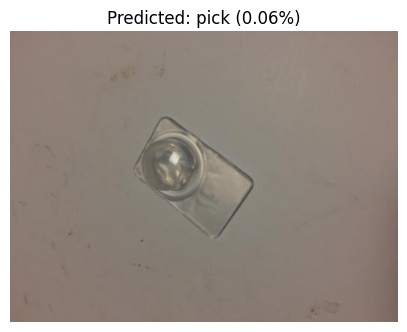

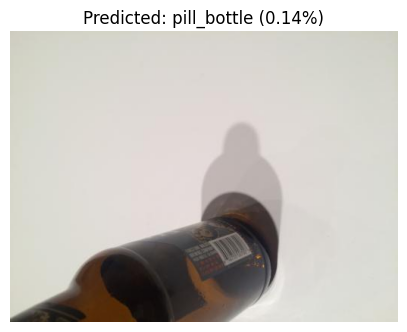

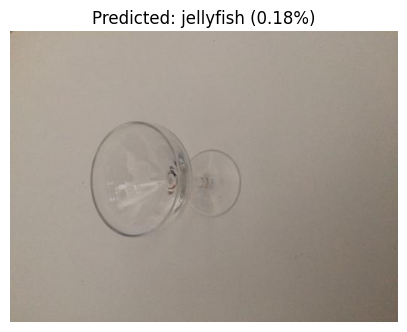

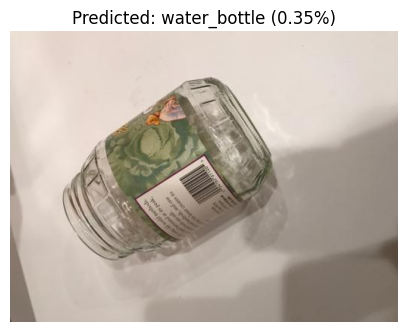

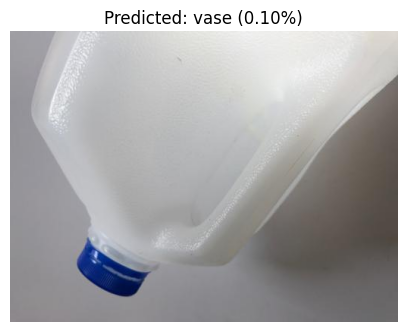

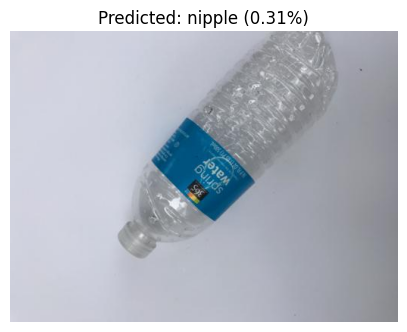

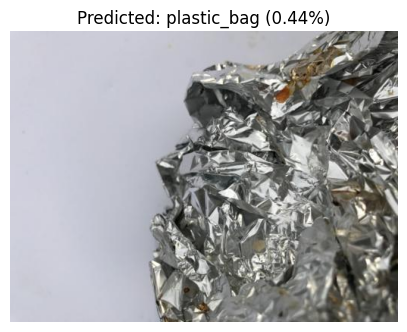

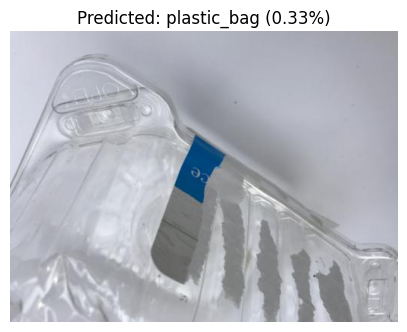

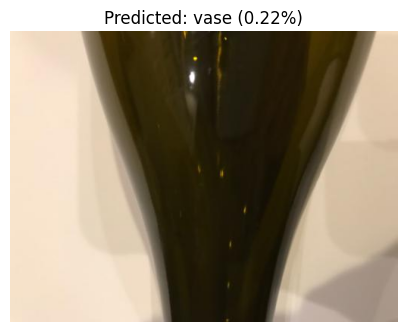

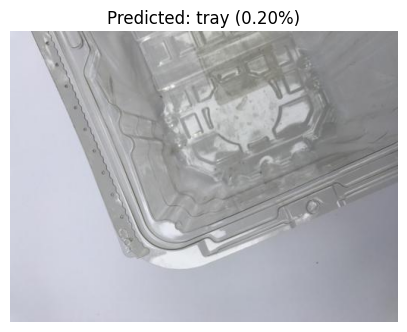

In [ ]:
predicted_classes = visualise_preds_efficientnetb0(model_efficientnet, garbage_img_list, True)

# BONUS: Compare All Models

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input as preprocess_input_vgg16, decode_predictions as decode_vgg16
from keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_input_resnet50, decode_predictions as decode_resnet50
from keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_input_inceptionv3, decode_predictions as decode_inceptionv3
from keras.applications.xception import Xception, preprocess_input as preprocess_input_xception, decode_predictions as decode_xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input as preprocess_input_inceptionresnetv2, decode_predictions as decode_inceptionresnetv2
from keras.applications.densenet import DenseNet121, preprocess_input as preprocess_input_densenet121, decode_predictions as decode_densenet121
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as preprocess_input_mobilenetv2, decode_predictions as decode_mobilenetv2
from keras.applications.efficientnet import EfficientNetB0, preprocess_input as preprocess_input_efficientnetb0, decode_predictions as decode_efficientnetb0


def model_predict(model, img_array):
    return model.predict(img_array, verbose=0)

def predict_main(models, image_paths):
    results = {}
    for img_path in image_paths:
        filename = img_path.split('/')[-1]

        results[filename] = {}

        for model_name, model_details in models.items():

            model, target_size, preprocess_input_func, decode_predictions_func = model_details

            img = image.load_img(img_path, target_size=target_size)

            img_array = image.img_to_array(img)

            img_array = preprocess_input_func(img_array[np.newaxis, ...])

            preds = model_predict(model, img_array)

            top_pred = decode_predictions_func(preds, top=1)[0][0]

            label, probability = top_pred[1], top_pred[2]

            results[filename][model_name] = (label, probability)

    return results



models = {
    'VGG16': (VGG16(weights='imagenet'), (224, 224), preprocess_input_vgg16, decode_vgg16),
    'ResNet50': (ResNet50(weights='imagenet'), (224, 224), preprocess_input_resnet50, decode_resnet50),
    'InceptionV3': (InceptionV3(weights='imagenet'), (299, 299), preprocess_input_inceptionv3, decode_inceptionv3),
    'Xception': (Xception(weights='imagenet'), (299, 299), preprocess_input_xception, decode_xception),
    'InceptionResNetV2': (InceptionResNetV2(weights='imagenet'), (299, 299), preprocess_input_inceptionresnetv2, decode_inceptionresnetv2),
    'DenseNet121': (DenseNet121(weights='imagenet'), (224, 224), preprocess_input_densenet121, decode_densenet121),
    'MobileNetV2': (MobileNetV2(weights='imagenet'), (224, 224), preprocess_input_mobilenetv2, decode_mobilenetv2),
    'EfficientNetB0': (EfficientNetB0(weights='imagenet'), (224, 224), preprocess_input_efficientnetb0, decode_efficientnetb0)

}


predicted_classes = predict_main(models, garbage_img_list)


for filename, model_results in predicted_classes.items():
    print(f"{filename}:")
    for model_name, (label, probability) in model_results.items():
        print(f"  {model_name}: {label} ({probability:.2f})")


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


trash126.jpg:
  VGG16: switch (0.32)
  ResNet50: combination_lock (0.59)
  InceptionV3: screw (0.39)
  Xception: safe (0.13)
  InceptionResNetV2: switch (0.43)
  DenseNet121: switch (0.47)
  MobileNetV2: switch (0.26)
  EfficientNetB0: pick (0.06)
glass256.jpg:
  VGG16: power_drill (0.26)
  ResNet50: beer_bottle (0.49)
  InceptionV3: beer_bottle (0.30)
  Xception: beer_bottle (0.39)
  InceptionResNetV2: beer_bottle (0.93)
  DenseNet121: beer_bottle (0.34)
  MobileNetV2: beer_bottle (0.18)
  EfficientNetB0: pill_bottle (0.14)
glass15.jpg:
  VGG16: bubble (0.43)
  ResNet50: washer (0.30)
  InceptionV3: Petri_dish (0.33)
  Xception: bubble (0.26)
  InceptionResNetV2: bubble (0.83)
  DenseNet121: bubble (0.42)
  MobileNetV2: bubble (0.61)
  EfficientNetB0: jellyfish (0.18)
glass427.jpg:
  VGG16: water_bottle (0.25)
  ResNet50: thimble (0.77)
  InceptionV3: water_jug (0.37)
  Xception: water_bottle (0.64)
  InceptionResNetV2: water_bottle (0.95)
  DenseNet121: whiskey_jug (0.18)
  MobileNet

# BONUS: Pretrained Models Using Pytorch

# Imports

In [ ]:
# !pip uninstall tf-keras
# !pip install tensorflow==2.16.1

In [1]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.3.3 Tensorflow Current Version: 2.16.1


In [2]:
from glob import glob
import random, os, datetime

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

# Functions

In [3]:
def get_image_paths(root_dir, num_images=None):
    all_images = []
    for extension in ['*.jpg', '*.jpeg', '*.png']:
        all_images.extend(glob(os.path.join(root_dir, '**', extension), recursive=True))
    if num_images is None:
        return all_images
    else:
        return random.sample(all_images, min(num_images, len(all_images)))

def display_images(img_list):
    plt.figure(figsize=(15, 6))
    for i, img_path in enumerate(img_list):
        img = image.load_img(img_path)
        img = image.img_to_array(img, dtype=np.uint8)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze())
        plt.axis('off')
        plt.title(f'Image {i+1}')
    plt.tight_layout()
    plt.show()


def print_predicted_classes(predicted_classes):
    for full_path, (label, probability) in predicted_classes.items():
        filename = os.path.basename(full_path)
        print(f"{filename}: {label} ({probability:.2f}%)")

# Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
imagenet_label_path = "/content/drive/MyDrive/Colab Notebooks/imagenet_samples/imagenet_classes.txt"

In [6]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/imagenet_samples'

img_list = get_image_paths(dir_path, 10)

# ResNet50

In [7]:
import torch
from PIL import Image

from torchvision import models, transforms
from torchvision.models import ResNet50_Weights

In [8]:
def predict(model, input_batch):
    with torch.no_grad():
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')
        output = model(input_batch)
    return output


In [9]:
def read_imagenet_labels(imagenet_labels_path):
    with open(imagenet_labels_path, "r") as f:
        categories = [s.strip() for s in f.readlines()]
    return categories

In [10]:
def get_top_category(probabilities, categories):
    top_prob, top_catid = torch.topk(probabilities, 1)
    return categories[top_catid[0]], top_prob[0].item()

In [11]:
def main(image_paths, imagenet_labels_path):

    weights = ResNet50_Weights.DEFAULT
    preprocess = weights.transforms()

    model = models.resnet50(weights=weights)
    model.eval()

    categories = read_imagenet_labels(imagenet_labels_path)

    results = {}
    for image_path in image_paths:
        input_image = Image.open(image_path).convert('RGB')

        input_tensor = preprocess(input_image)

        input_batch = input_tensor.unsqueeze(0)

        output = predict(model, input_batch)

        probabilities = torch.nn.functional.softmax(output[0], dim=0)

        category, probability = get_top_category(probabilities, categories)
        print(f"{category}: {probability}")

main(img_list, imagenet_label_path)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 197MB/s]


Eskimo dog: 0.2489299327135086
dalmatian: 0.3041020631790161
triumphal arch: 0.5085957646369934
hen: 0.3733191192150116
tiger shark: 0.6557409167289734
tricycle: 0.3483656346797943
pot: 0.7660768628120422
printer: 0.42257657647132874
goldfinch: 0.5189776420593262
electric ray: 0.3292076885700226


# DenseNet

In [12]:
available_models = [model for model in dir(models) if not model.startswith("__")]


In [13]:
print("Available image classification models in torchvision:")
for model in available_models:
    print(model)

# DenseNet121_Weights

Available image classification models in torchvision:
AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights
ConvNeXt_Small_Weights
ConvNeXt_Tiny_Weights
DenseNet
DenseNet121_Weights
DenseNet161_Weights
DenseNet169_Weights
DenseNet201_Weights
EfficientNet
EfficientNet_B0_Weights
EfficientNet_B1_Weights
EfficientNet_B2_Weights
EfficientNet_B3_Weights
EfficientNet_B4_Weights
EfficientNet_B5_Weights
EfficientNet_B6_Weights
EfficientNet_B7_Weights
EfficientNet_V2_L_Weights
EfficientNet_V2_M_Weights
EfficientNet_V2_S_Weights
GoogLeNet
GoogLeNetOutputs
GoogLeNet_Weights
Inception3
InceptionOutputs
Inception_V3_Weights
MNASNet
MNASNet0_5_Weights
MNASNet0_75_Weights
MNASNet1_0_Weights
MNASNet1_3_Weights
MaxVit
MaxVit_T_Weights
MobileNetV2
MobileNetV3
MobileNet_V2_Weights
MobileNet_V3_Large_Weights
MobileNet_V3_Small_Weights
RegNet
RegNet_X_16GF_Weights
RegNet_X_1_6GF_Weights
RegNet_X_32GF_Weights
RegNet_X_3_2GF_Weights
RegNet_X_400MF_Weights
RegNet_X_800MF_Weights
RegNet

In [17]:
from torchvision.models import DenseNet121_Weights

In [14]:
def predict(model, input_batch):
    with torch.no_grad():
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')
        output = model(input_batch)
    return output

In [15]:
def read_imagenet_labels(imagenet_labels_path):
    with open(imagenet_labels_path, "r") as f:
        categories = [s.strip() for s in f.readlines()]
    return categories

In [16]:
def get_top_category(probabilities, categories):
    top_prob, top_catid = torch.topk(probabilities, 1)
    return categories[top_catid[0]], top_prob[0].item()

In [18]:
def main(image_paths, imagenet_labels_path):

    weights = DenseNet121_Weights.DEFAULT
    preprocess = weights.transforms()

    model = models.densenet121(weights=weights)
    model.eval()

    categories = read_imagenet_labels(imagenet_labels_path)

    results = {}
    for image_path in image_paths:
        input_image = Image.open(image_path).convert('RGB')

        input_tensor = preprocess(input_image)

        input_batch = input_tensor.unsqueeze(0)

        output = predict(model, input_batch)

        probabilities = torch.nn.functional.softmax(output[0], dim=0)

        category, probability = get_top_category(probabilities, categories)
        print(f"{category}: {probability}")

main(img_list, imagenet_label_path)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 99.9MB/s]


Eskimo dog: 0.6027806997299194
dalmatian: 0.9996883869171143
suit: 0.6068630218505859
hen: 0.7849324941635132
tiger shark: 0.992205798625946
tricycle: 0.3728189170360565
pot: 0.8697991967201233
printer: 0.4757591485977173
goldfinch: 0.9993450045585632
electric ray: 0.9459180235862732


# MobileNetV2

In [ ]:
available_models = [model for model in dir(models) if not model.startswith("__")]

In [19]:
print("Available image classification models in torchvision:")
for model in available_models:
    print(model)

# mobilenet_v2

Available image classification models in torchvision:
AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights
ConvNeXt_Small_Weights
ConvNeXt_Tiny_Weights
DenseNet
DenseNet121_Weights
DenseNet161_Weights
DenseNet169_Weights
DenseNet201_Weights
EfficientNet
EfficientNet_B0_Weights
EfficientNet_B1_Weights
EfficientNet_B2_Weights
EfficientNet_B3_Weights
EfficientNet_B4_Weights
EfficientNet_B5_Weights
EfficientNet_B6_Weights
EfficientNet_B7_Weights
EfficientNet_V2_L_Weights
EfficientNet_V2_M_Weights
EfficientNet_V2_S_Weights
GoogLeNet
GoogLeNetOutputs
GoogLeNet_Weights
Inception3
InceptionOutputs
Inception_V3_Weights
MNASNet
MNASNet0_5_Weights
MNASNet0_75_Weights
MNASNet1_0_Weights
MNASNet1_3_Weights
MaxVit
MaxVit_T_Weights
MobileNetV2
MobileNetV3
MobileNet_V2_Weights
MobileNet_V3_Large_Weights
MobileNet_V3_Small_Weights
RegNet
RegNet_X_16GF_Weights
RegNet_X_1_6GF_Weights
RegNet_X_32GF_Weights
RegNet_X_3_2GF_Weights
RegNet_X_400MF_Weights
RegNet_X_800MF_Weights
RegNet

In [25]:
from torchvision.models import MobileNet_V2_Weights

In [21]:
def predict(model, input_batch):
    with torch.no_grad():
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')
        output = model(input_batch)
    return output

In [22]:
def read_imagenet_labels(imagenet_labels_path):
    with open(imagenet_labels_path, "r") as f:
        categories = [s.strip() for s in f.readlines()]
    return categories

In [23]:
def get_top_category(probabilities, categories):
    top_prob, top_catid = torch.topk(probabilities, 1)
    return categories[top_catid[0]], top_prob[0].item()

In [26]:
def main(image_paths, imagenet_labels_path):

    weights = MobileNet_V2_Weights.DEFAULT
    preprocess = weights.transforms()

    model = models.mobilenet_v2(weights=weights)
    model.eval()

    categories = read_imagenet_labels(imagenet_labels_path)

    results = {}
    for image_path in image_paths:
        input_image = Image.open(image_path).convert('RGB')

        input_tensor = preprocess(input_image)

        input_batch = input_tensor.unsqueeze(0)

        output = predict(model, input_batch)

        probabilities = torch.nn.functional.softmax(output[0], dim=0)

        category, probability = get_top_category(probabilities, categories)
        print(f"{category}: {probability}")

main(img_list, imagenet_label_path)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 63.0MB/s]


Eskimo dog: 0.12976783514022827
dalmatian: 0.4100497364997864
triumphal arch: 0.19584308564662933
hen: 0.23773826658725739
tiger shark: 0.6126402616500854
bicycle-built-for-two: 0.07114873081445694
pot: 0.264251172542572
printer: 0.0719783827662468
goldfinch: 0.6759424209594727
electric ray: 0.3441491425037384


# EfficientNetv2

In [ ]:
available_models = [model for model in dir(models) if not model.startswith("__")]

In [ ]:
print("Available image classification models in torchvision:")
for model in available_models:
    print(model)


Available image classification models in torchvision:
AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights
ConvNeXt_Small_Weights
ConvNeXt_Tiny_Weights
DenseNet
DenseNet121_Weights
DenseNet161_Weights
DenseNet169_Weights
DenseNet201_Weights
EfficientNet
EfficientNet_B0_Weights
EfficientNet_B1_Weights
EfficientNet_B2_Weights
EfficientNet_B3_Weights
EfficientNet_B4_Weights
EfficientNet_B5_Weights
EfficientNet_B6_Weights
EfficientNet_B7_Weights
EfficientNet_V2_L_Weights
EfficientNet_V2_M_Weights
EfficientNet_V2_S_Weights
GoogLeNet
GoogLeNetOutputs
GoogLeNet_Weights
Inception3
InceptionOutputs
Inception_V3_Weights
MNASNet
MNASNet0_5_Weights
MNASNet0_75_Weights
MNASNet1_0_Weights
MNASNet1_3_Weights
MaxVit
MaxVit_T_Weights
MobileNetV2
MobileNetV3
MobileNet_V2_Weights
MobileNet_V3_Large_Weights
MobileNet_V3_Small_Weights
RegNet
RegNet_X_16GF_Weights
RegNet_X_1_6GF_Weights
RegNet_X_32GF_Weights
RegNet_X_3_2GF_Weights
RegNet_X_400MF_Weights
RegNet_X_800MF_Weights
RegNet

In [27]:
from torchvision.models import EfficientNet_V2_S_Weights

In [ ]:
def predict(model, input_batch):
    with torch.no_grad():
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')
        output = model(input_batch)
    return output

In [ ]:
def read_imagenet_labels(imagenet_labels_path):
    with open(imagenet_labels_path, "r") as f:
        categories = [s.strip() for s in f.readlines()]
    return categories

In [ ]:
def get_top_category(probabilities, categories):
    top_prob, top_catid = torch.topk(probabilities, 1)
    return categories[top_catid[0]], top_prob[0].item()

In [28]:
def main(image_paths, imagenet_labels_path):

    weights = EfficientNet_V2_S_Weights.DEFAULT
    preprocess = weights.transforms()

    model = models.efficientnet_v2_s(weights=weights)
    model.eval()

    categories = read_imagenet_labels(imagenet_labels_path)

    results = {}
    for image_path in image_paths:
        input_image = Image.open(image_path).convert('RGB')

        input_tensor = preprocess(input_image)

        input_batch = input_tensor.unsqueeze(0)

        output = predict(model, input_batch)

        probabilities = torch.nn.functional.softmax(output[0], dim=0)

        category, probability = get_top_category(probabilities, categories)
        print(f"{category}: {probability}")

main(img_list, imagenet_label_path)

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:01<00:00, 54.5MB/s]


Eskimo dog: 0.3928649425506592
dalmatian: 0.7810634970664978
triumphal arch: 0.8004859089851379
hen: 0.7787617444992065
tiger shark: 0.7842795252799988
tricycle: 0.6825079917907715
pot: 0.636151909828186
printer: 0.7548609375953674
goldfinch: 0.799388587474823
stingray: 0.5085306167602539
